### Wprowadzenie - regresja liniowa
Oryginalny kod: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

RMSE: 1.06
RMSE: 10.62
RMSE: 26.55
RMSE: 53.11


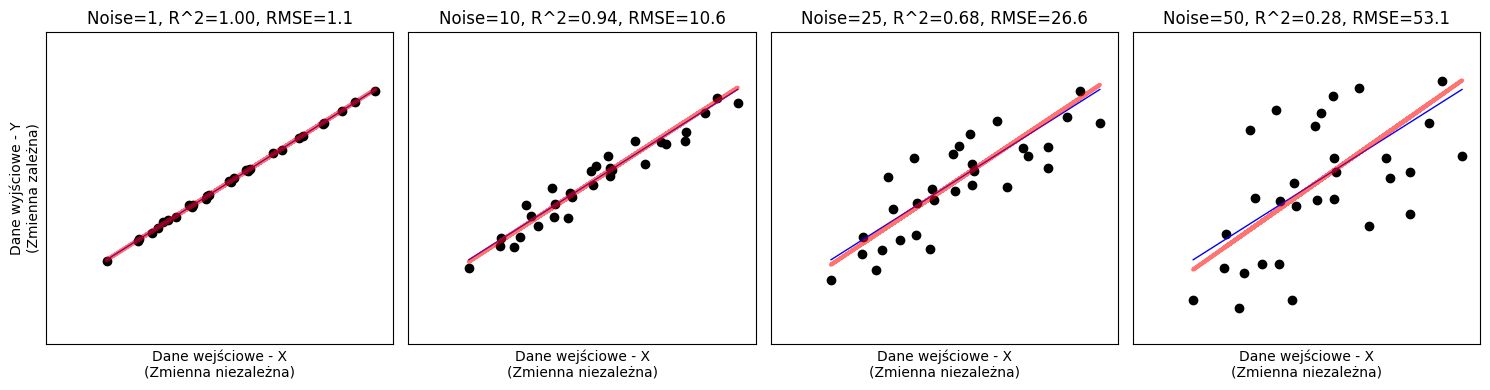

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for i, noise in enumerate([1.0, 10.0, 25.0, 50.0]):
    x, y, coef = make_regression(n_samples=100, n_features=1, noise=noise, random_state=0, coef=True)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0, shuffle=True)
    x = x.flatten()


    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    # The mean squared error
    print(f"RMSE: {mean_squared_error(y_test, y_pred)**.5:.2f}")

    # Plot outputs
    axes[i].scatter(x_test, y_test, color="black")    
    axes[i].plot([np.min(x_test),np.max(x_test)], [np.min(x_test)*coef,np.max(x_test)*coef], color="blue", linewidth=1, alpha=1.0)
    axes[i].plot(x_test, y_pred, color="red", linewidth=3, alpha=0.55)

    axes[i].set_xticks(())
    axes[i].set_yticks(())

    axes[i].set_xlabel("Dane wejściowe - X\n(Zmienna niezależna)")
    axes[0].set_ylabel("Dane wyjściowe - Y\n(Zmienna zależna)")


    axes[i].set_xlim(-2.5, 2.5)
    axes[i].set_ylim(-150, 150)

    axes[i].set_title(f"Noise={int(noise)}, R^2={r2_score(y_test, y_pred):.2f}, RMSE={mean_squared_error(y_test, y_pred)**.5:.1f}")

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np

DATASET_PATH = "Dane\\BostonHousing.csv"

In [3]:
# Wczytanie datasetu California Housing
dataset = pd.read_csv(DATASET_PATH)

In [4]:
# Informacje o zestawie danych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
DATASET_FEATURE_DSCRB = {
    "crim": "Per capita crime rate by town",
    "zn": "Proportion of residential land zoned for lots over 25,000 sq.ft",
    "indus": "Proportion of non-retail business acres per town",
    "chas": "Charles River dummy variable (1 if tract bounds river; 0 otherwise)",
    "nox": "Nitric oxides concentration (parts per 10 million)",
    "RM": "Average number of rooms per dwelling",
    "age": "Proportion of owner-occupied units built prior to 1940",
    "dis": "Weighted distances to five Boston employment centres",
    "rad": "Index of accessibility to radial highways",
    "tax": "Full-value property-tax rate per $10,000",
    "ptratio": "Pupil-teacher ratio by town",
    "b": "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "lstat": r"% lower status of the population",
    "medv": "Median value of owner-occupied homes in $1000's",
}
DATASET_FEATURE_LABELS = {
    "crim": "crime",
    "zn": "zoned prop.",
    "indus": "industry prop.",
    "chas": "Charles River",
    "nox": "NOX",
    "rm": "No. rooms",
    "age": "pre-1940",
    "dis": "weighted dist.",
    "rad": "radial highways",
    "tax": "property tax",
    "ptratio": "pupil-teacher ratio",
    "b": "proportion of blacks",
    "lstat": "lower status",
    "medv": "median value",
}

In [6]:
# Zmiana nazwy kolumn
dataset = dataset.rename(columns=DATASET_FEATURE_LABELS)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crime                 506 non-null    float64
 1   zoned prop.           506 non-null    float64
 2   industry prop.        506 non-null    float64
 3   Charles River         506 non-null    int64  
 4   NOX                   506 non-null    float64
 5   No. rooms             506 non-null    float64
 6   pre-1940              506 non-null    float64
 7   weighted dist.        506 non-null    float64
 8   radial highways       506 non-null    int64  
 9   property tax          506 non-null    int64  
 10  pupil-teacher ratio   506 non-null    float64
 11  proportion of blacks  506 non-null    float64
 12  lower status          506 non-null    float64
 13  median value          506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Brakujące dane

In [7]:
# Znalezienie brakujących danych
dataset.isnull().any()

crime                   False
zoned prop.             False
industry prop.          False
Charles River           False
NOX                     False
No. rooms               False
pre-1940                False
weighted dist.          False
radial highways         False
property tax            False
pupil-teacher ratio     False
proportion of blacks    False
lower status            False
median value            False
dtype: bool

In [8]:
# W rzędzie jest brakująca wartość
isnull = dataset.isnull().any(axis=1)
print(np.count_nonzero(isnull),"brakujących wartości.")
# Usunięcie rzędu
dataset = dataset.drop(np.asarray(isnull).nonzero()[0].tolist() ,axis=0)

0 brakujących wartości.


In [9]:
# Podgląd pierwszych 10 rzędów
dataset.head(10)

,crime,zoned prop.,industry prop.,Charles River,NOX,No. rooms,pre-1940,weighted dist.,radial highways,property tax,pupil-teacher ratio,proportion of blacks,lower status,median value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
# Znalezienie kolumn z danymi kategorialnymi (nienumerycznymi)
dataset_cat=dataset.select_dtypes(include='object')
dataset_cat.columns

Index([], dtype='object')

### Wydzielenie zmiennej zależnej

In [11]:
# Wydzielenie zmiennej zależnej (Y)
x,y = dataset.drop(columns=["median value"]), dataset["median value"]

### EDA

In [12]:
# Podstawowa analiza statystyczna
x.describe()

,crime,zoned prop.,industry prop.,Charles River,NOX,No. rooms,pre-1940,weighted dist.,radial highways,property tax,pupil-teacher ratio,proportion of blacks,lower status
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


array([[<Axes: title={'center': 'crime'}>,
        <Axes: title={'center': 'zoned prop.'}>,
        <Axes: title={'center': 'industry prop.'}>,
        <Axes: title={'center': 'Charles River'}>],
       [<Axes: title={'center': 'NOX'}>,
        <Axes: title={'center': 'No. rooms'}>,
        <Axes: title={'center': 'pre-1940'}>,
        <Axes: title={'center': 'weighted dist.'}>],
       [<Axes: title={'center': 'radial highways'}>,
        <Axes: title={'center': 'property tax'}>,
        <Axes: title={'center': 'pupil-teacher ratio'}>,
        <Axes: title={'center': 'proportion of blacks'}>],
       [<Axes: title={'center': 'lower status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

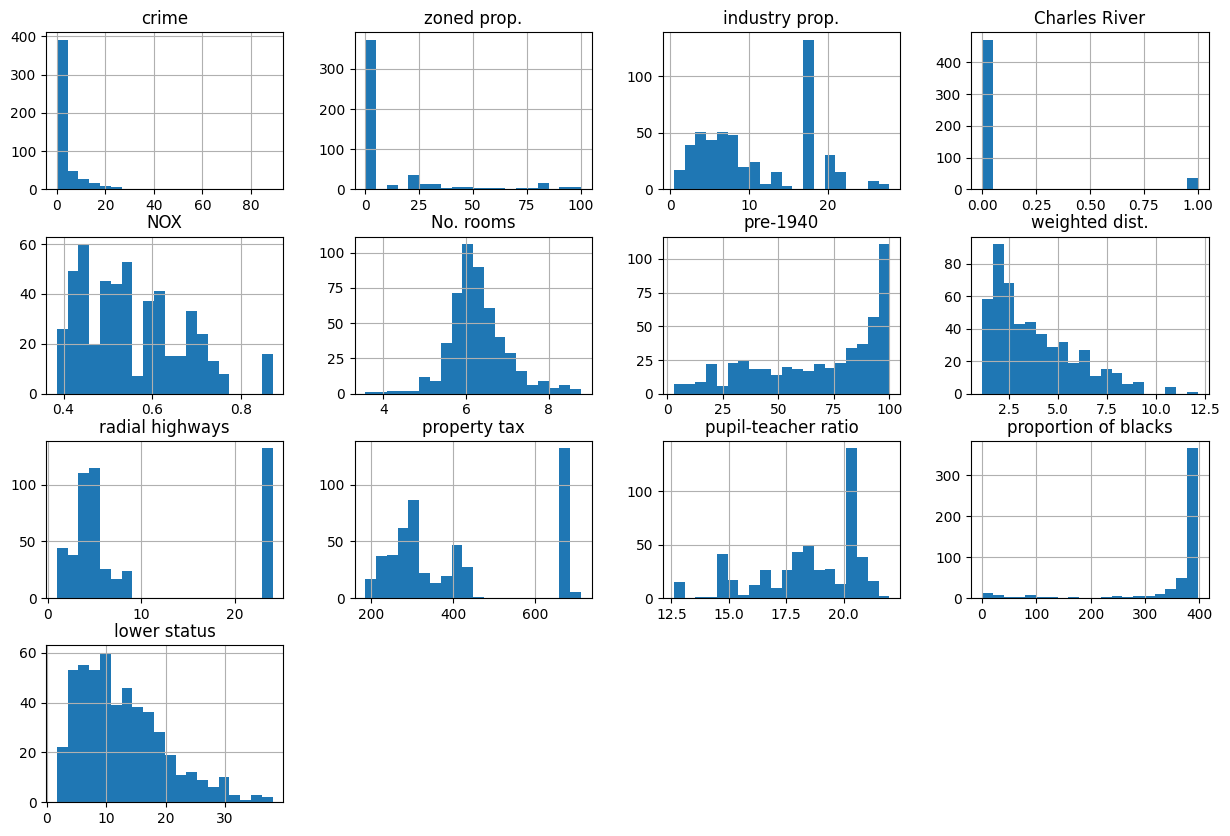

In [13]:
# Hisotgramy zmiennych niezależnych
x.hist(figsize=(15,10), bins=20)

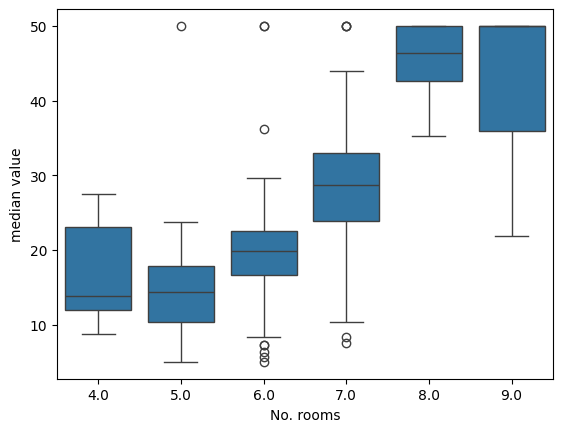

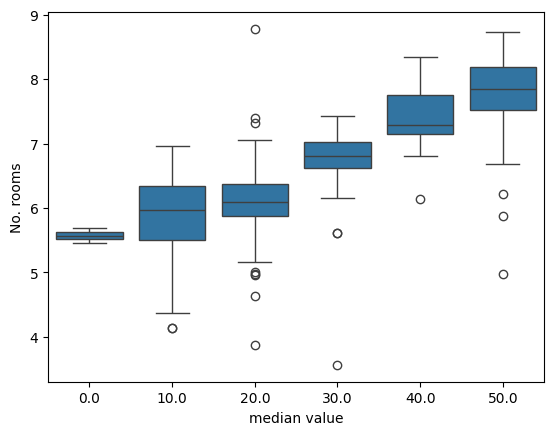

In [49]:
# Wykresy BOXPLOT

import seaborn as sns
import matplotlib.pyplot as plt

# Zmienna zależna Y(median value) w zależności od ilości pokojów 
plt.clf()
sns.boxplot(y=y, x=x["No. rooms"].round())
plt.show()

plt.clf()
sns.boxplot(y=x["No. rooms"], x=y.round(-1))
plt.show()

<Axes: >

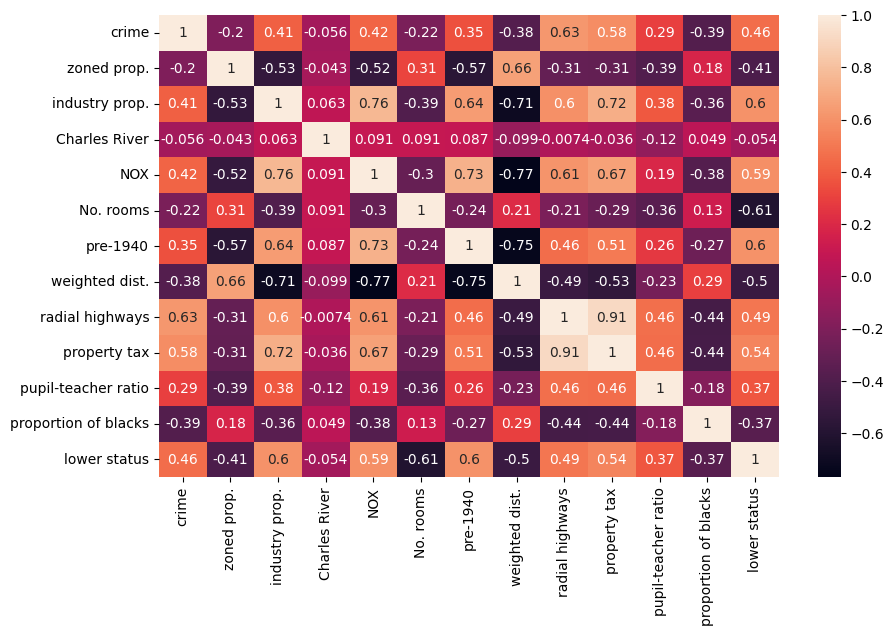

In [50]:
# Analiza korelacji pomiędzy zmiennymi

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(x.select_dtypes(exclude='object').corr(), ax=ax, annot=True)

### Train, Test, Val split

In [ ]:
# Podział na subsety TRAIN, TEST oraz VAL

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=5, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=5, shuffle=True)

In [ ]:
x_train.describe()

In [ ]:
x_val.describe()

In [ ]:
x_test.describe()

### Skalowanie wartości niezależnych

In [ ]:
# Skalowanie zmiennych niezależnych numerycznych z użyciem StandardScaler
# Enkodowanie zmiennych niezależnych kategorycznych z użyciem OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn.compose import make_column_transformer


col_categorical = x_train.select_dtypes(include='object').columns
col_numerical = x_train.select_dtypes(exclude='object').columns

col_transformer = make_column_transformer(
    (StandardScaler(), col_numerical),
    (OrdinalEncoder(), col_categorical)
)

### Regresja - model regresji linowej, drzewo decyzyjne

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Regresja liniowa

from sklearn.linear_model import LinearRegression

linear_regressor = Pipeline([
    ('col_transformer', col_transformer),
    ('linear_regressor', LinearRegression(positive=True))
])
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_train)
print(f"RMSE: {mean_squared_error(y_train, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_train, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_train, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw treningowy")
ax.grid(True)
plt.show()


In [ ]:
# Drzewo decyzyjne

from sklearn.tree import DecisionTreeRegressor

decision_tree = Pipeline([
    ('col_transformer', col_transformer),
    ('decision_tree', DecisionTreeRegressor())
])
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_train)
print(f"RMSE: {mean_squared_error(y_train, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_train, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_train, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw treningowy")
ax.grid(True)
plt.show()

### Ewaluacja

In [ ]:
# Ewaluacja regresji liniowej na zestawie walidacyjnym

y_pred = linear_regressor.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

In [ ]:
# Ewaluacja drzewa decyzyjnego na zestawie walidacyjnym

y_pred = decision_tree.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

### Strojenie hiperparametrów

In [ ]:
# Listowanie parametrów drzewa decyzyjnego
decision_tree['decision_tree'].get_params()

In [ ]:
# Dobór wielkości drzewa decyzyjnego
rmse = []
depths = [1, 2, 5, 10, 15, 20, 25, 50]
for depth in depths:

    decision_tree.set_params(**{'decision_tree__max_depth': depth})
    decision_tree.fit(x_val, y_val)
    y_pred = decision_tree.predict(x_val)
    rmse.append(mean_squared_error(y_val, y_pred)**.5)

best_depth, best_rmse = depths[np.argmin(rmse)], np.min(rmse)
    

print(f"Best RMSE: {best_rmse:.2f} dla max_depth={best_depth}")


In [ ]:
# Zastosowanie hiperparametrów i ponowny trening
decision_tree.set_params(**{'decision_tree__max_depth': best_depth})

decision_tree.fit(x_train, y_train)

In [ ]:
# Ewaluacja na zestawie walidacyjnym
y_pred = decision_tree.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

### Selekcja cech metodą LASSO

In [ ]:
# Regresja Lasso do oceny ważności zmiennych niezależnych

from sklearn.linear_model import Lasso

lasso = Pipeline([
    ('col_transformer', col_transformer),
    ('lasso', Lasso(alpha=1e-05, max_iter=4000))
])

lasso.fit(x_train, y_train)

In [ ]:
# Wyznaczenie ważności zmiennych niezależnych i ich wizualizacja

lasso_coef = np.abs(lasso['lasso'].coef_)
lasso_coef /= np.sum(lasso_coef)

THRESH = 0.045

decision_tree_coef = np.abs(decision_tree['decision_tree'].feature_importances_)
decision_tree_coef /= np.sum(decision_tree_coef)

# plotting the Column Names and Importance of Columns. 
fig,axes = plt.subplots(1,2,figsize=(10,3))

axes[0].bar(x_train.columns.values, lasso_coef)
axes[0].axhline(y=THRESH, color='r', linestyle='-')
axes[0].grid()
axes[0].set_xticks(x_train.columns.values)
axes[0].set_xticklabels(x_train.columns.values, rotation = 90)
axes[0].set_title("Ważność cech wyznaczona metodą LASSO")
axes[0].set_xlabel("Nazwa cechy")
axes[0].set_ylabel("Wpływ")

axes[1].bar(x_train.columns.values, decision_tree_coef)
axes[1].grid()
axes[1].set_xticks(x_train.columns.values)
axes[1].set_xticklabels(x_train.columns.values, rotation = 90)
axes[1].set_title("Wpływ cech na model - Decision Tree")
axes[1].set_xlabel("Nazwa cechy")
axes[1].set_ylabel("Wpływ")

plt.show()

features_selected = x_train.columns[lasso_coef > THRESH]
features_ignored = x_train.columns[lasso_coef <= THRESH]
print(features_selected)

In [ ]:
# Usunięcie zmiennych nieistotnych
x_train = x_train.drop(columns=features_ignored)
x_val = x_val.drop(columns=features_ignored)
x_test = x_test.drop(columns=features_ignored)

In [ ]:
# Ponowne stworzenie pipeline'u oraz trenowanie modelu drzewa decyzyjnego dla zestawu z nowymi zmiennymi

col_categorical = x_train.select_dtypes(include='object').columns
col_numerical = x_train.select_dtypes(exclude='object').columns

col_transformer = make_column_transformer(
    (StandardScaler(), col_numerical),
    (OrdinalEncoder(), col_categorical)
)

decision_tree = Pipeline([
    ('col_transformer', col_transformer),
    ('decision_tree', DecisionTreeRegressor(max_depth=best_depth))
])


decision_tree.fit(x_train, y_train)

In [ ]:
# Wyznaczenie wpłwu cech niezależnych na model

decision_tree_coef = np.abs(decision_tree['decision_tree'].feature_importances_)
decision_tree_coef /= np.sum(decision_tree_coef)

# plotting the Column Names and Importance of Columns. 
fig,ax = plt.subplots(1,1,figsize=(5,3))

ax.bar(x_train.columns.values, decision_tree_coef)
ax.grid()
ax.set_xticks(x_train.columns.values)
ax.set_xticklabels(x_train.columns.values, rotation = 90)
ax.set_title("Wpływ cech na model - Decision Tree")
ax.set_xlabel("Nazwa cechy")
ax.set_ylabel("Wpływ")

plt.show()

In [ ]:
# Ewaluacja na zestawie walidacyjnym
y_pred = decision_tree.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

### Walidacja na zbiorze testowym (finalna)

In [ ]:
y_pred = decision_tree.predict(x_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_test, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw testowy") 
ax.grid(True)
plt.show()